Explore a Restaurant dataset containing information about payments ('tips.csv'):


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [7]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [12]:
df.day.unique() #The restaurant is opened 4 days per week: sun, sat, thur, fri
len(df.day.unique()) # 4

4

<Axes: xlabel='day', ylabel='count'>

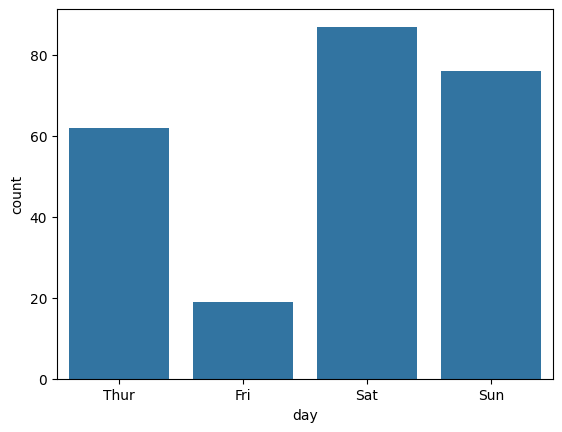

In [15]:
df['day'].value_counts()
sns.countplot(data=df, x='day', order=['Thur', 'Fri', 'Sat', 'Sun']) #Saturday is the day with more bills

<Axes: xlabel='sex', ylabel='count'>

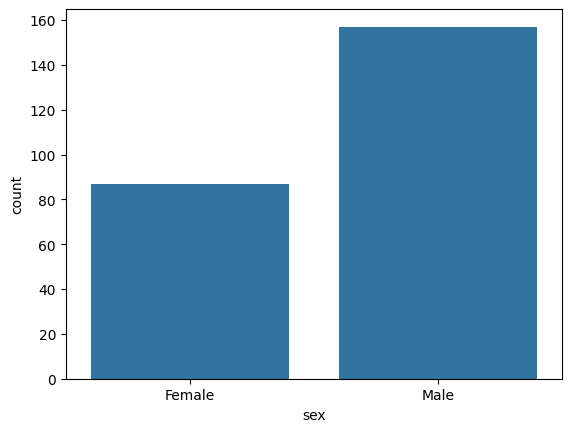

In [16]:
df['sex'].value_counts()
sns.countplot(data=df, x='sex')
#More males than females

<Axes: xlabel='smoker', ylabel='count'>

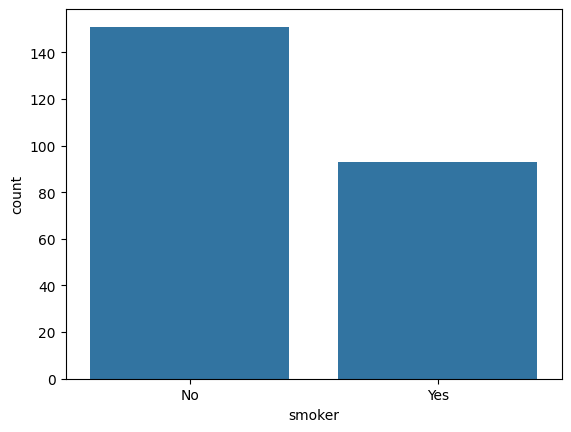

In [17]:
df['smoker'].value_counts()
sns.countplot(data=df, x='smoker')
#More non-smokers than smokers

<Axes: xlabel='time', ylabel='count'>

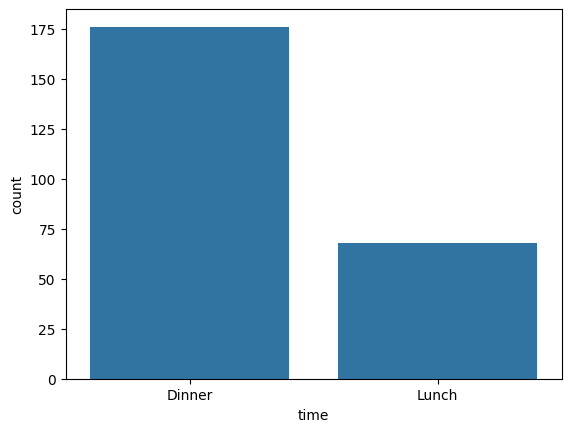

In [18]:
df['time'].value_counts()
sns.countplot(data=df, x='time')
#The bill count is bigger for dinner than lunch (more than 100%)

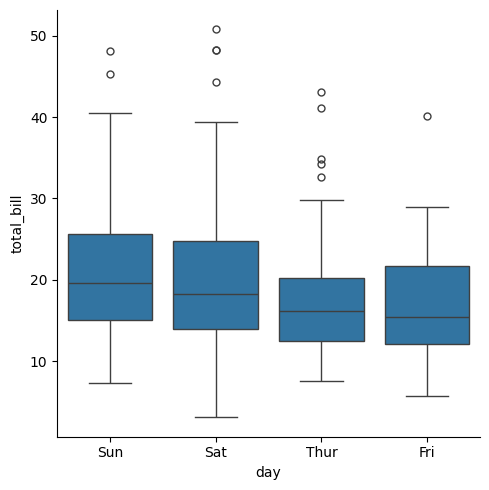

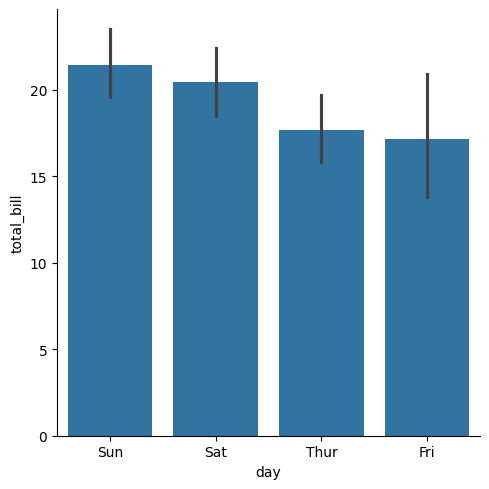

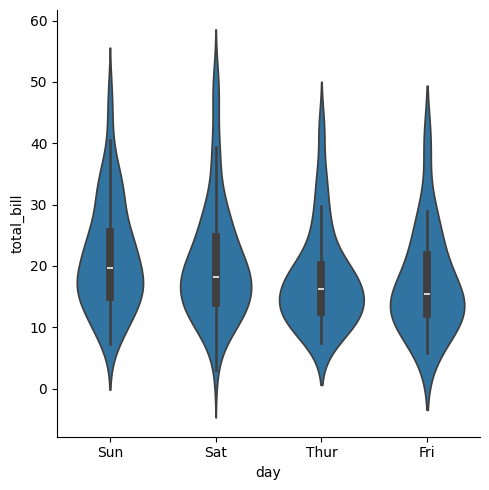

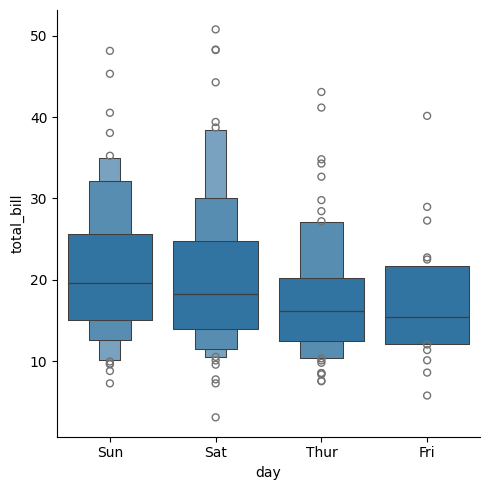

In [21]:
#Distribution plot for total_bill
sns.catplot(data=df, x='day', y='total_bill', kind="box")
sns.catplot(data=df, x='day', y='total_bill', kind="bar")
sns.catplot(data=df, x='day', y='total_bill', kind="violin")
sns.catplot(data=df, x='day', y='total_bill', kind="boxen")

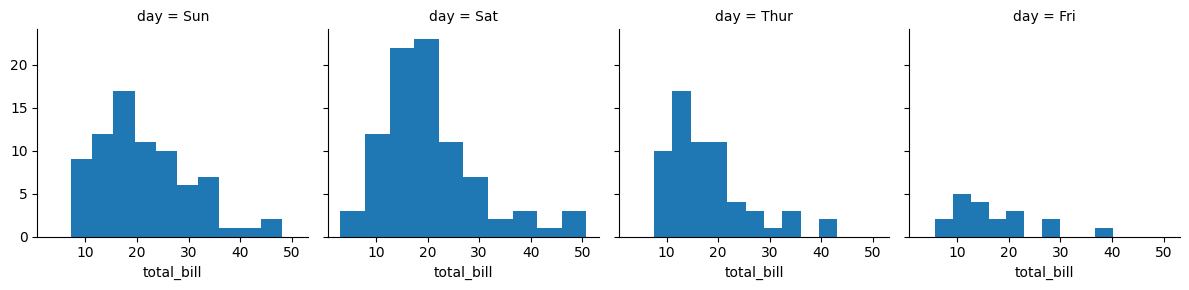

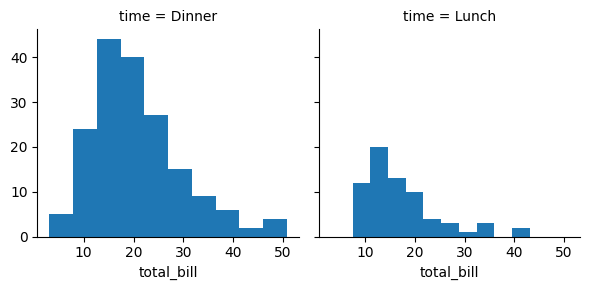

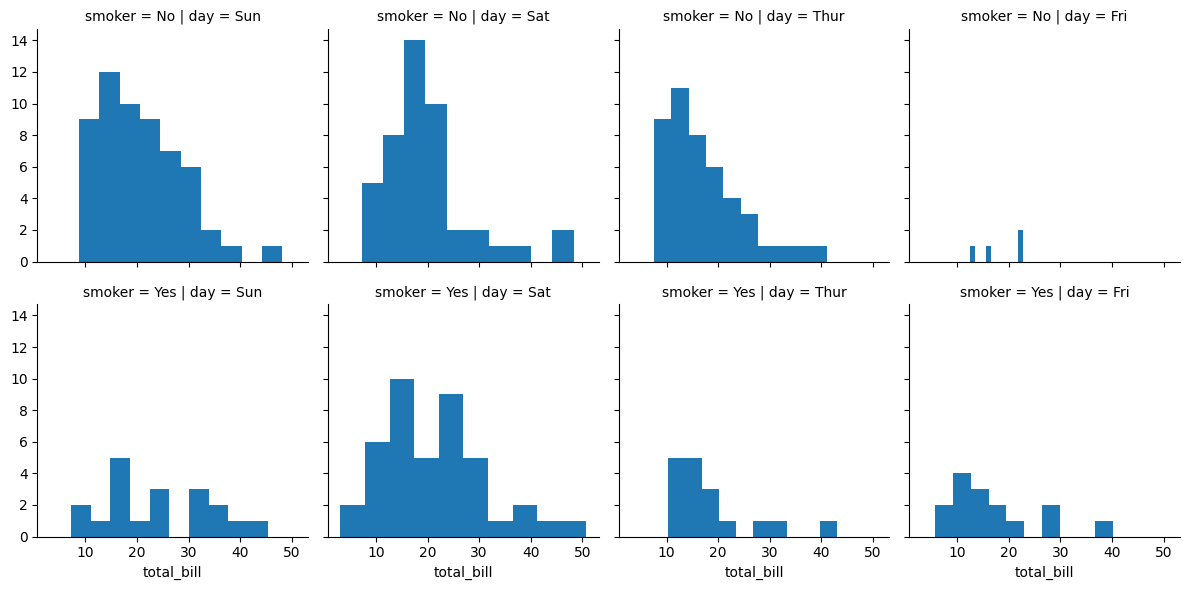

In [24]:
# Use of seaborn.FacetGrid
g = sns.FacetGrid(df, col="day")
g.map(plt.hist, "total_bill")

g = sns.FacetGrid(df, col="time")
g.map(plt.hist, "total_bill")

g = sns.FacetGrid(df, col="day",row='smoker')
g.map(plt.hist, "total_bill")

Correlations

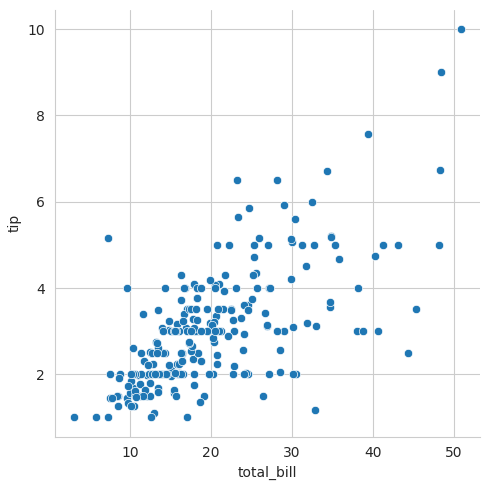

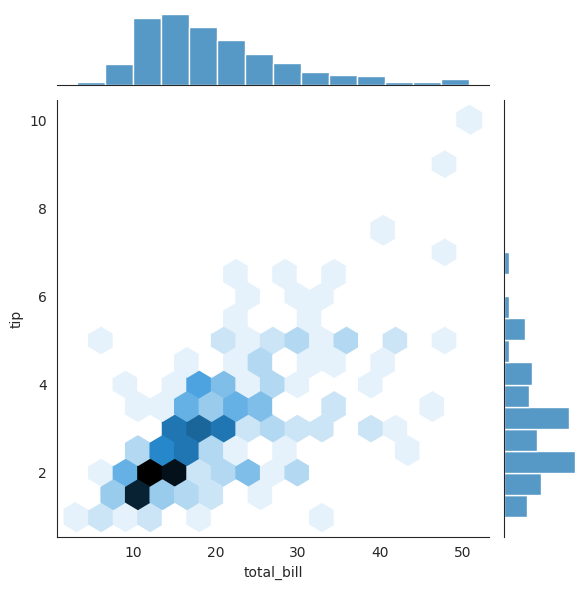

In [27]:
#relationship between the columns tip and total_bill
with sns.axes_style(style="whitegrid"): sns.relplot(x="total_bill", y="tip", data=df)

with sns.axes_style("white"): sns.jointplot(x="total_bill", y="tip", kind="hex", data=df)

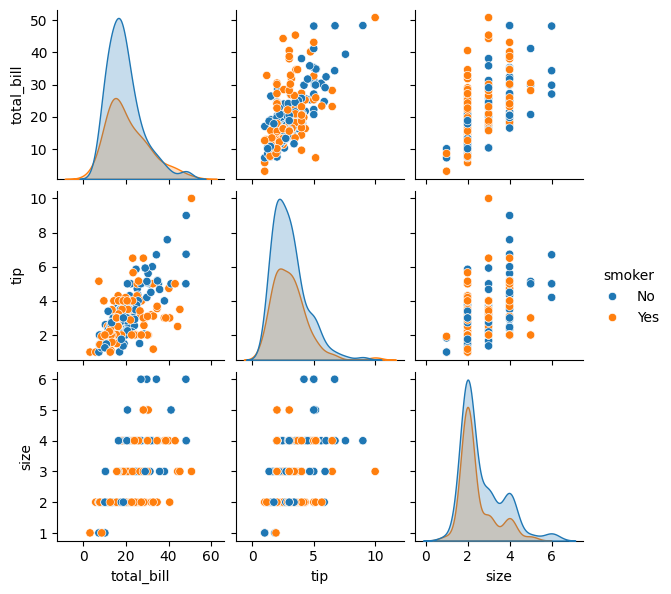

In [29]:
#A very useful tool to identify correlations is the seaborn.pairplot:
sns.pairplot(df, height=2, hue="smoker")

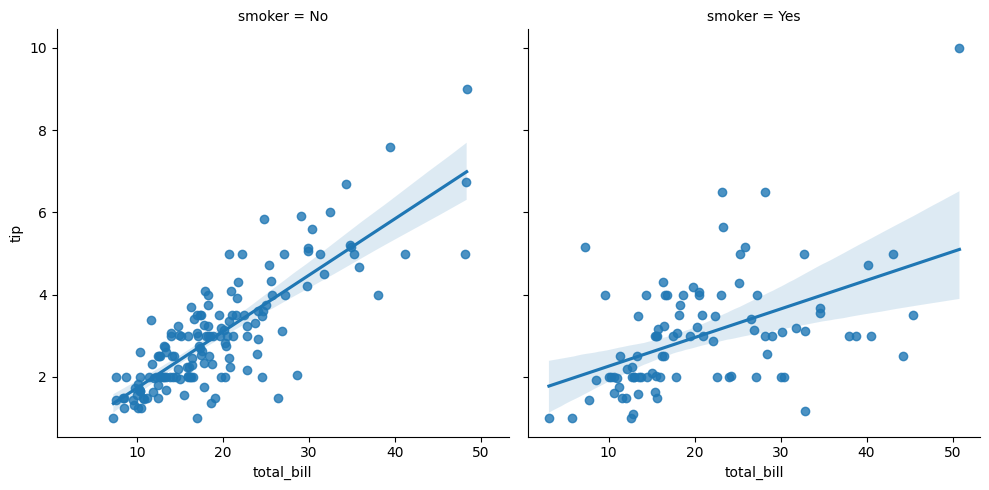

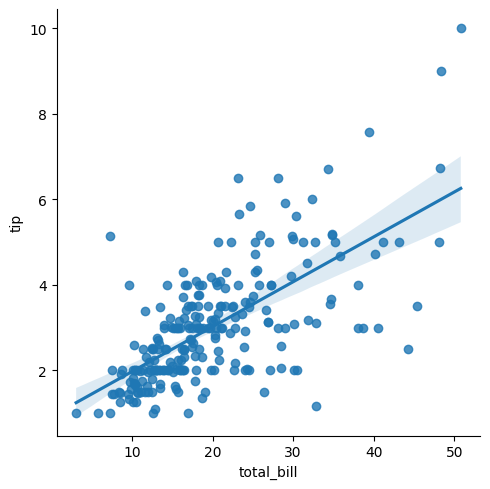

In [31]:
#Linear regression

sns.lmplot(x="total_bill", y="tip", col="smoker", data=df) #split by smoker/non-smoker

sns.lmplot(x="total_bill", y="tip", data=df) #without split

In [47]:
from statistics import mean
df2 = df[["total_bill", "tip","size"]]
df2.mean()

total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64